In [6]:
!pip3 install pillow

    100% |████████████████████████████████| 2.0MB 679kB/s 


In [1]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print(iris_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
from sklearn import cluster, datasets, metrics

hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2)

# 印出績效
hclust.fit(iris_X)
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.6867350732769776


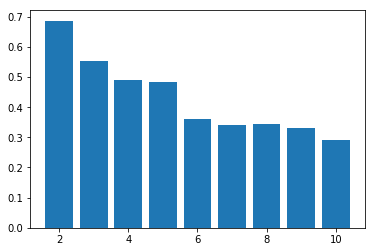

[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073, 0.3422071936620491, 0.3435906599119526, 0.3304886352874647, 0.29253860430301143]


In [23]:
import matplotlib.pyplot as plt

silhouette_avgs=[]

ks = range(2, 11)
for k in ks:
    hclust_fit = cluster.AgglomerativeClustering(n_clusters = k).fit(iris_X)
    cluster_labels = hclust_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

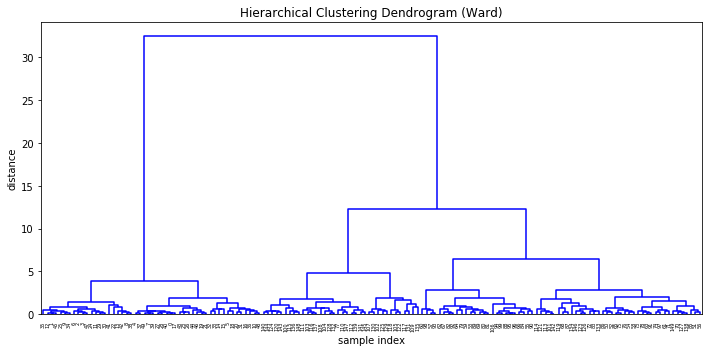

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib .pyplot as plt

X = iris.data[:, :] 

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(10, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()
